![Banner logo](https://github.com/zackyndra23/Data_Science/blob/main/Banner1.jpg?raw=true)

# **Amazon Alexa Review - Sentiment Analysis**
*by Zaky Indra Satria Putra

Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

### Importing required libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split                  # Splitting the dataset into training and testing sets
from sklearn.preprocessing import MinMaxScaler                        # Scaling features to a specific range using MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer           # Transforming text data into a bag-of-words representation
from sklearn.model_selection import cross_val_score                   # Evaluating model performance using cross-validation scores
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier                   # Importing Random Forest Classifier for classification tasks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Confusion matrix and display tools
from sklearn.model_selection import GridSearchCV                      # Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import StratifiedKFold                   # Stratified K-Folds cross-validator for cross-validation
from sklearn.metrics import accuracy_score                            # Evaluating model accuracy
from wordcloud import WordCloud                                       # Creating word clouds for visualizing text data
from sklearn.tree import DecisionTreeClassifier                       # Importing Decision Tree Classifier for classification tasks
from xgboost import XGBClassifier                                     # Importing XGBoost Classifier for boosting ensemble learning
import pickle                                                         # Importing pickle for model serialization
import re                                                             # Regular expression library for text preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%pip install wordcloud

### Exploratory Data Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the data

data = pd.read_csv(r"/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Data/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [5]:
# # Install the ydata_profiling library using the magic command %pip
# %pip install ydata_profiling

In [6]:
# # Import the ProfileReport class from ydata_profiling
# from ydata_profiling import ProfileReport

# # Generate the data profile report
# # Note: Replace 'data' with the actual DataFrame you want to profile
# profile = ProfileReport(data, title="Profiling Report")
# profile

In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
# Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [9]:
# Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

There is no record with no 'verified_reviews' (null value)

In [10]:
# Example of getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [11]:
# We will drop the null record

data.dropna(inplace=True)

In [12]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [13]:
# Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [14]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The 'length' column is new generated column - stores the length of 'verified_reviews' for that record. Let's check for some sample records

In [15]:
# Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") # Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}")          # Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}")                    # Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


We can see that the length of review is the same as the value in the length column for that record

Datatypes of the features

In [16]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

* rating, feedback and length are integer values <br>
* date, variation and verified_reviews are string values

### Analyzing 'rating' column

This column refers to the rating of the variation given by the user

In [17]:
len(data)

3149

In [18]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


Let's plot the above values in a bar graph

In [19]:
data_rate = data['rating'].value_counts().reset_index()

# Plotly Express
fig = px.bar(data_rate,
             x='index',  # Set the x-axis to represent the ratings
             y='rating',
             labels={'index': 'Rating', 'rating': 'Count'},  # Modify axis labels
             text='rating',  # Display count values as text above the bars
             )

# Setting the size of the plot
fig.update_layout(
    width=800,  # Width of the plot
    height=500,  # Height of the plot
    title="Rating Distribution Count",
    title_x=0.5  # Center the title above the plot
)

# Display count values above the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['rating', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

In [21]:
import plotly.express as px

# Using the index column as the x value
fig = px.bar(data_rate,
             x=data_rate.index,  # Using the index as the x value
             y='rating',
             labels={'index': 'Rating', 'rating': 'Count'},  # Modify axis labels
             text='rating',  # Display count values as text above the bars
             )

# Setting the size of the plot
fig.update_layout(
    width=800,  # Width of the plot
    height=500,  # Height of the plot
    title="Rating Distribution Count",
    title_x=0.5  # Center the title above the plot
)

# Display count values above the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

In [23]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


Let's plot the above values in a pie chart

In [24]:
colors = ['red', 'green', 'blue', 'orange', 'yellow']

tags = data['rating'].value_counts() / data.shape[0]

fig = px.pie(tags,
             names=tags.index,
             values=tags.values,
             color_discrete_sequence=colors,
             title="Percentage-wise Distribution of Rating",
             hole=0.35,  # Set the size of the central hole in the pie chart
             )

# Customize layout
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    title_x=0.5,  # Center the title above the plot
)

# Customize hover text to display percent and total observations
fig.update_traces(hoverinfo="label+percent",
                  textinfo="label+percent",
                  textposition="inside",
                  )

# Add total observations annotation
fig.add_annotation(
    text="Total Observations",
    x=0.5,
    y=0.45,
    showarrow=False,
    font_size=15,
)

fig.add_annotation(
    text=str(data.shape[0]),
    x=0.5,
    y=0.525,
    font_size=40,
    showarrow=False,
)

# Show the plot
fig.show()

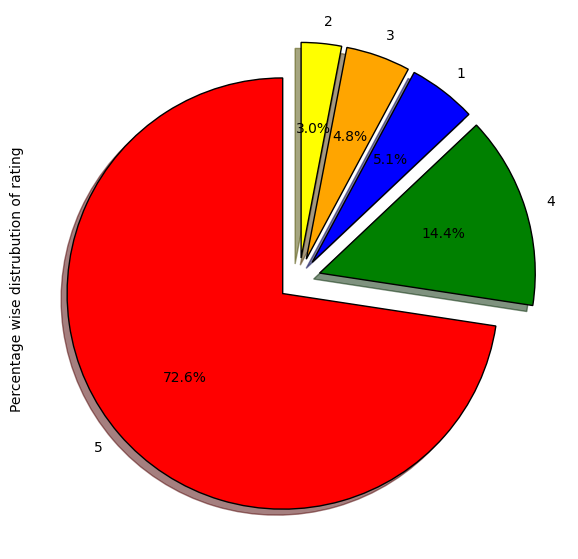

In [25]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

### Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [26]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


There are 2 unique values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

feedback value = 0

In [27]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [28]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


From the above 2 examples we can see that feedback **0 is negative review** and **1 is positive review**

Let's plot the feedback value count in a bar graph

In [34]:
# Data preparation
data_feedback_count = data['feedback'].value_counts().reset_index()

# Plotly Express bar chart with red color
fig = px.bar(data_feedback_count,
             x=data_feedback_count.index,  # Using index as x-axis values
             y='count',
             color_discrete_sequence=['red'],  # Set color to red
             labels={'index': 'Feedback', 'count': 'Count'},  # Modify axis labels
             )

# Setting the size of the plot
fig.update_layout(
    width=450,  # Width of the plot
    height=600,  # Height of the plot
    title="Feedback Distribution Count",
    title_x=0.5,  # Center the title above the plot
)

# Show the plot
fig.show()


In [35]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


Feedback distribution <br>
* 91.84% reviews are positive <br>
* 8.16% reviews are negative

<Axes: ylabel='Percentage wise distrubution of feedback'>

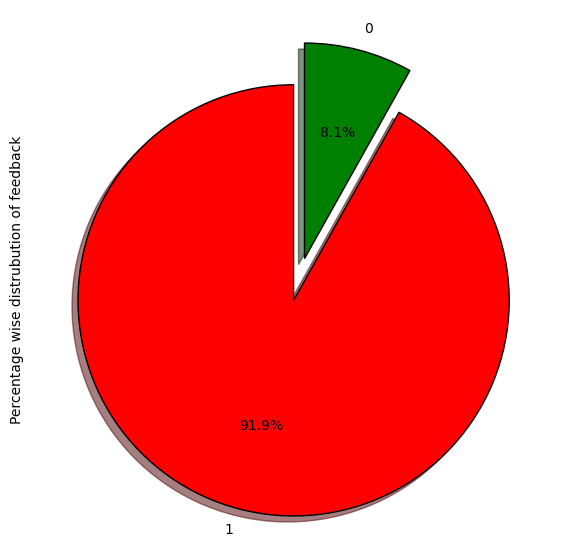

In [36]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

Let's see the 'rating' values for different values of 'feedback'

In [37]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [38]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

##### If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

### Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [39]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [66]:
# Data preparation
data_variation_count = data['variation'].value_counts().reset_index()

# Plotly Express bar chart with orange color
fig = px.bar(data_variation_count,
             x='count',  # Using count as x-axis values
             y='variation',
             color_discrete_sequence=['orange'],  # Set color to orange
             labels={'index': 'Count', 'variation': 'Variation'},  # Modify axis labels
             text='count',  # Display count values as text above the bars
             )

# Setting the size of the plot
fig.update_layout(
    width=950,  # Width of the plot
    height=600,  # Height of the plot
    title="Variation Distribution Count",
    title_x=0.5,  # Center the title above the plot
)

# Display count values above the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Reverse the order of bars
fig.update_yaxes(categoryorder='total ascending')

# Show the plot
fig.show()

In [67]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


Mean rating according to variation

In [68]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Let's analyze the above ratings

In [69]:
import plotly.express as px

# Data preparation
variation_mean_rating = data.groupby('variation')['rating'].mean().sort_values().reset_index()

# Round the 'rating' column to two decimal places
variation_mean_rating['rating'] = variation_mean_rating['rating'].round(2)

# Plotly Express bar chart with green color
fig = px.bar(variation_mean_rating,
             x='variation',  # Set x-axis to represent variation
             y='rating',
             color_discrete_sequence=['green'],  # Set color to green
             labels={'variation': 'Variation', 'rating': 'Mean Rating'},  # Modify axis labels
             text='rating',  # Display mean rating values as text above the bars
             )

# Setting the size of the plot
fig.update_layout(
    width=1100,  # Width of the plot
    height=600,  # Height of the plot
    title="Mean Rating According to Variation",
    title_x=0.5,  # Center the title above the plot
)

# Display mean rating values above the bars without specific formatting
fig.update_traces(texttemplate='%{text}', hovertemplate='Mean Rating: %{y}', textposition='outside')

# Show the plot
fig.show()

### Analyzing 'verified_reviews' column

This column contains the textual review given by the user for a variation for the product.

In [70]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

Length analysis for full dataset

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



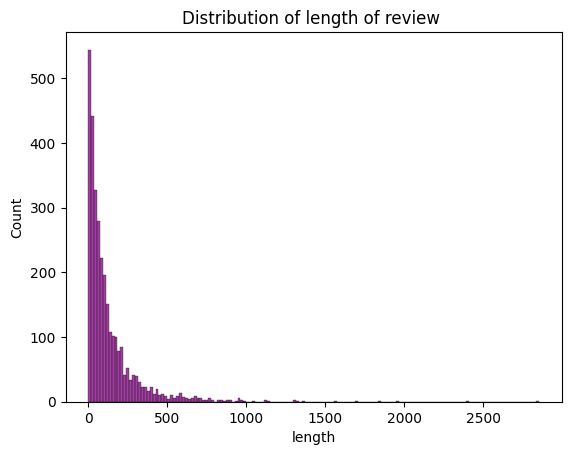

In [71]:
sns.histplot(data['length'], color='purple').set(title='Distribution of length of review ')
plt.show()

Length analysis when feedback is 0 (negative)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

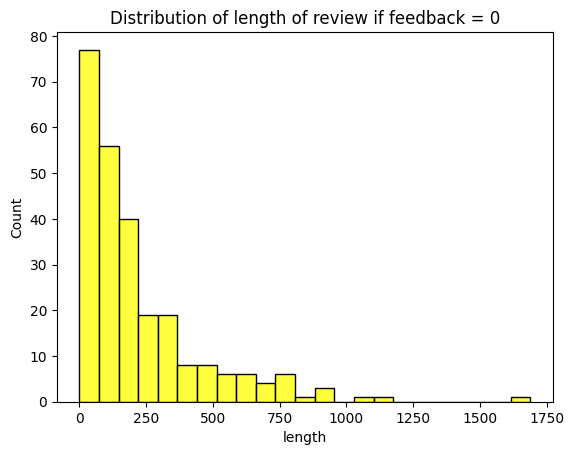

In [72]:
sns.histplot(data[data['feedback']==0]['length'],color='yellow').set(title='Distribution of length of review if feedback = 0')

Length analysis when feedback is 1 (positive)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

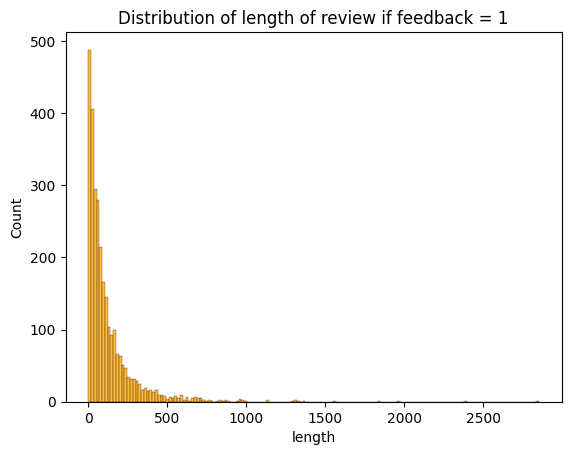

In [73]:
sns.histplot(data[data['feedback']==1]['length'],color='orange').set(title='Distribution of length of review if feedback = 1')

Lengthwise mean rating

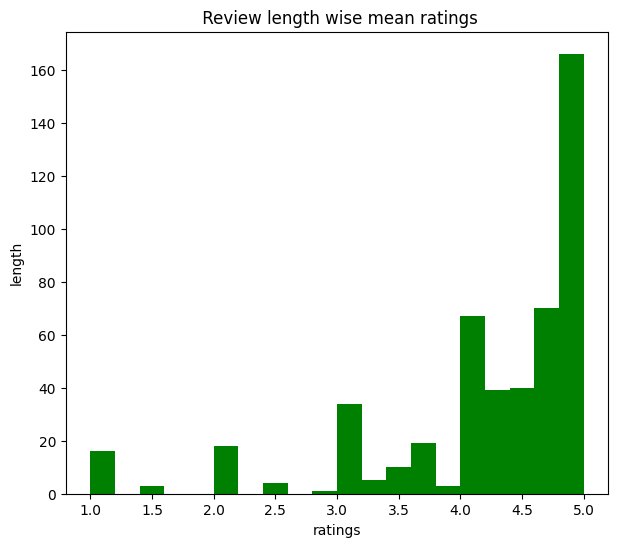

In [74]:
data.groupby('length')['rating'].mean().plot.hist(color = 'green', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

## **Text Preprocessing 1**

**Methods:**

1. Converting to lower case
2. Contraction
3. Remove or convert number into text
4. Remove punctuation
5. Remove white spaces
6. Remove stopwords and particular words

**1. Converting to lower case**

In [75]:
def to_lower(text):
    return text.lower()

**2. Contraction**

There are no abbreviations

In [76]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}


def expand_contractions(text, contractions_dict):

    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    # pada text/df['email'], ketika ada pattern seperti pada "contractions_pattern", maka akan kita ganti dengan "expanded_match"
    expanded_text = contractions_pattern.sub(expand_match, text)

    # pada expanded text, ketika ada kutip satu "'", maka kita hapus atau kita ganti dengan string kosong ""
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# agar nanti hanya memasukkan 1 argumen saja
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [77]:
contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]

    expanded_contraction = contractions_dict.get(match) \
        if contractions_dict.get(match) \
        else contractions_dict.get(match.lower())
    expanded_contraction = expanded_contraction
    return expanded_contraction

expanded_text = contractions_pattern.sub(expand_match, data['verified_reviews'].apply(to_lower)[0])
expanded_text = re.sub("'", "", expanded_text)
expanded_text

'love my echo!'

**3. Remove or convert number into text**

Removing numbers from text

In [78]:
data['verified_reviews'][3]

'"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."'

In [79]:
text = data['verified_reviews'][3]

' '.join(re.split('URL|NUMBER|_', text))

'"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."'

In [80]:
def remove_numbers(text):
    output = ''.join(x for x in text if not x.isdigit())
    return output

In [81]:
def remove_NUMBER_url(text):
    output = ' '.join(re.split('url|number', text))
    return output

**4. Remove punctuation**

In [82]:
from string import punctuation

In [83]:
def remove_punct(text):
    return ''.join(x for x in text if x not in punctuation)

**5. Remove white spaces**

In [84]:
def to_strip(text):
    return " ".join(text.split())

**6. Remove stop words and particular words**

In [85]:
import nltk
from nltk.corpus import stopwords

In [86]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([x for x in nltk.word_tokenize(sentence) if not x in stop_words])

## **Combine preprocessing methods**

In [87]:
data.head(3)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197


In [88]:
data2 = data.copy()
data2 = data2[['feedback','verified_reviews']]
data2.head(3)

,feedback,verified_reviews
0,1,Love my Echo!
1,1,Loved it!
2,1,"""Sometimes while playing a game, you can answe..."


In [89]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [90]:
data2['reviews1'] = data2['verified_reviews'].apply(to_lower)
data2['reviews2'] = data2['reviews1'].apply(main_contraction)
data2['reviews3'] = data2['reviews2'].apply(remove_numbers)
data2['reviews4'] = data2['reviews3'].apply(remove_NUMBER_url)
data2['reviews5'] = data2['reviews4'].apply(remove_punct)
data2['reviews6'] = data2['reviews5'].apply(to_strip)
data2['reviews7'] = data2['reviews6'].apply(remove_stopwords)

data2.head(3)

,feedback,verified_reviews,reviews1,reviews2,reviews3,reviews4,reviews5,reviews6,reviews7
0,1,Love my Echo!,love my echo!,love my echo!,love my echo!,love my echo!,love my echo,love my echo,love echo
1,1,Loved it!,loved it!,loved it!,loved it!,loved it!,loved it,loved it,loved
2,1,"""Sometimes while playing a game, you can answe...","""sometimes while playing a game, you can answe...","""sometimes while playing a game, you can answe...","""sometimes while playing a game, you can answe...","""sometimes while playing a game, you can answe...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,sometimes playing game answer question correct...


## **Text preprocessing 2**

### **Lemmatization**

In [91]:
from nltk.stem import WordNetLemmatizer

In [92]:
# Lemmatizing a word
wordnet_lemmatizer = WordNetLemmatizer()

In [93]:
def lemmatize_3(text):

    word_lemma = []

    # Splitting 1 email into multiple sentences
    for sent in nltk.sent_tokenize(text):

        # Splitting 1 sentence into multiple words
        for word in nltk.word_tokenize(sent):
            lemma_word = wordnet_lemmatizer.lemmatize(word)
            word_lemma.append(lemma_word)

    return ' '.join(word_lemma)

data2['reviews6'].apply(lemmatize_3)

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my yr ...
4                                                   music
                              ...                        
3145        perfect for kid adult and everyone in between
3146    listening to music searching location checking...
3147    i do love these thing i have them running my e...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: reviews6, Length: 3149, dtype: object

In [94]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

**Apply lemmatization**

In [95]:
data2['reviews_lemma'] = data2['reviews7'].apply(lemmatize)
data2['reviews_lemma']

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing yr old learns dinosaur control l...
4                                                   music
                              ...                        
3145                           perfect kid adult everyone
3146    listening music searching location checking ti...
3147    love thing running entire home tv light thermo...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: reviews_lemma, Length: 3149, dtype: object

## **Text exploration**



### **Words frequency**

In [96]:
def count_word(text):

    data_text = text.str.extractall('([a-zA-Z]+)')        # Extract all words using regular expression
    data_text.columns = ['freq']                          # Rename the column to 'freq'
    data_text = data_text.reset_index()                   # Reset the index
    data_unique_word = data_text['freq'].value_counts()   # Count the frequency of each unique word
    data_unique_word = data_unique_word.to_frame().reset_index().rename(columns={'index':'word'})  # Reset index and rename columns for clarity

    return data_unique_word


In [97]:
count_word(data2['reviews_lemma'])

,freq,count
0,love,998
1,echo,856
2,great,717
3,alexa,615
4,work,532
...,...,...
3814,atmosphere,1
3815,showno,1
3816,joy,1
3817,dryer,1


In [98]:
data2_pos = data2[data2['feedback']==1]
data2_neg = data2[data2['feedback']==0]

In [104]:
# Use count_word function to get the top 20 most frequent words (positive)
top_words_data = count_word(data2_pos['reviews_lemma']).head(20)

# Create a bar chart with Plotly
fig = px.bar(
    top_words_data,
    x='count',
    y='freq',  # Use index as y-axis values
    orientation='h',                   # Horizontal orientation
    text='count',                       # Display word count on the bars
    color_discrete_sequence=['blue'],  # Set the color to blue
    labels={'freq': 'Word Count', 'index': 'Word'}  # Modify axis labels
)

# Customize the layout
fig.update_layout(
    title_text='Most Frequent Words on Positive Reviews',
    title_x=0.5,                                 # Set title position to the center
    yaxis_title='Word',
    xaxis_title='Word Count',
    yaxis=dict(categoryorder='total ascending')  # Order y-axis by total word count
)

# Show the plot
fig.show()

In [193]:
# Use count_word function to get the top 20 most frequent words (positive)
top_words_data = count_word(data2_neg['reviews_lemma']).head(20)

# Create a bar chart with Plotly
fig = px.bar(
    top_words_data,
    x='count',
    y='freq',  # Use index as y-axis values
    orientation='h',                   # Horizontal orientation
    text='count',                       # Display word count on the bars
    color_discrete_sequence=['red'],  # Set the color to blue
    labels={'freq': 'Word Count', 'index': 'Word'}  # Modify axis labels
)

# Customize the layout
fig.update_layout(
    title_text='Most Frequent Words on Negative Reviews',
    title_x=0.5,                                 # Set title position to the center
    yaxis_title='Word',
    xaxis_title='Word Count',
    yaxis=dict(categoryorder='total ascending')  # Order y-axis by total word count
)

# Show the plot
fig.show()

Insights :
1. The most frequently occurring words in the positive review corpus/dataset are 'love', 'echo', 'great', 'alexa', and so on.
1. Conversely, the most frequently occurring words in the negative review corpus/dataset are 'echo', 'device', 'work', 'amazon', and so forth.
1. Words that are commonly repeated and considered to hold little value can be excluded or added to the stopwords list during the preprocessing stage.

### **Word cloud**

In [105]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis('off')

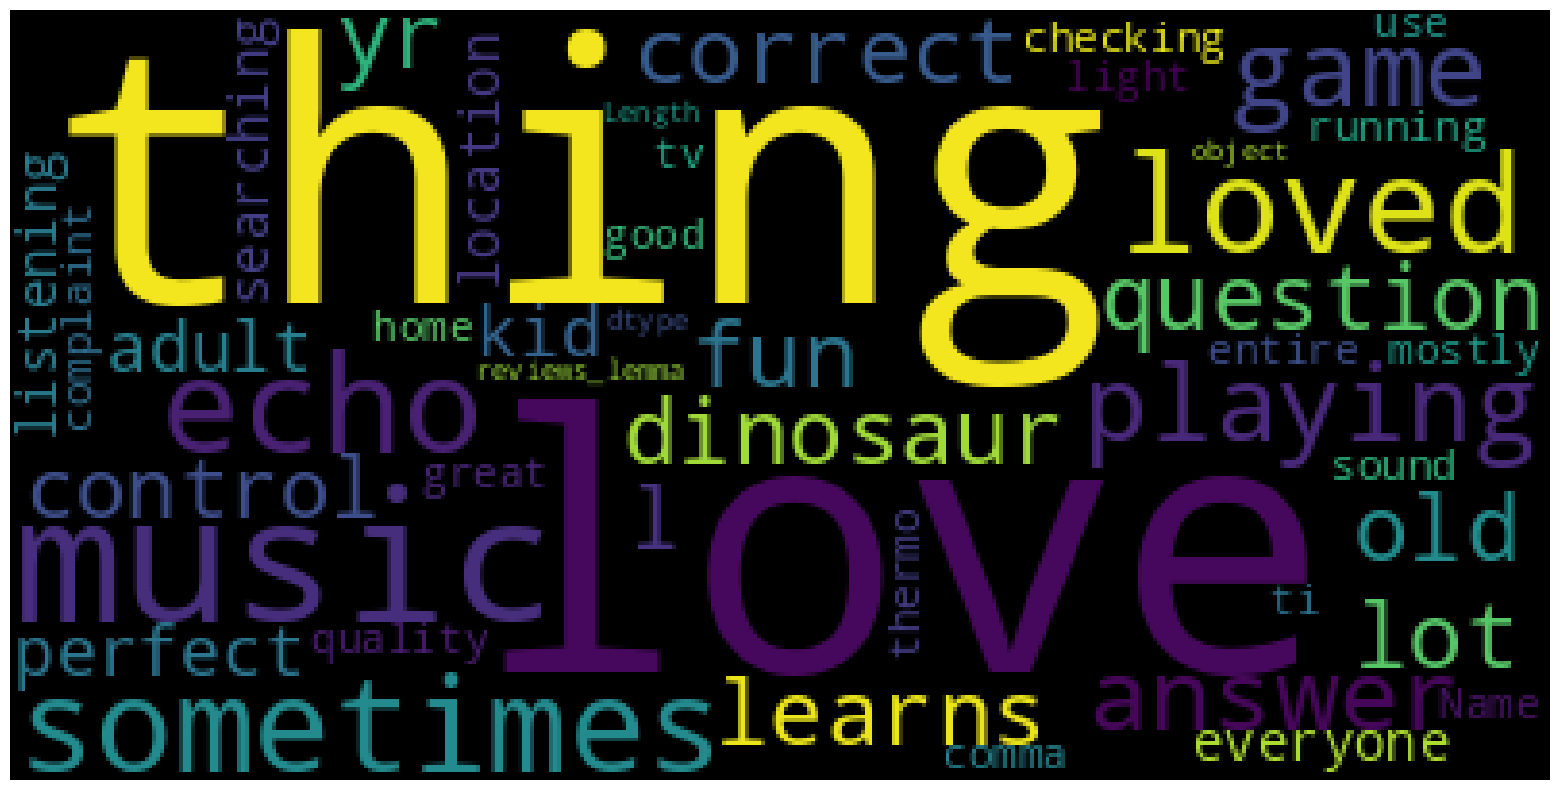

In [106]:
word_cloud_all = WordCloud().generate(str(data2['reviews_lemma']))
plot_cloud(word_cloud_all)

In [107]:
data_count_all =  count_word(data2['reviews_lemma'])
data_count_all.head()

,freq,count
0,love,998
1,echo,856
2,great,717
3,alexa,615
4,work,532


In [108]:
data_count_pos =  count_word(data2_pos['reviews_lemma'])
data_count_pos.head()

,freq,count
0,love,992
1,echo,764
2,great,699
3,alexa,561
4,music,494


In [109]:
data_count_neg =  count_word(data2_neg['reviews_lemma'])
data_count_neg.head()

,freq,count
0,echo,92
1,device,77
2,work,66
3,amazon,60
4,would,58


In [112]:
data_count_all

,freq,count
0,love,998
1,echo,856
2,great,717
3,alexa,615
4,work,532
...,...,...
3814,atmosphere,1
3815,showno,1
3816,joy,1
3817,dryer,1


In [115]:
# Rename the column 'freq' to 'word'
data_count_all.rename(columns={'freq': 'word'}, inplace=True)
data_count_pos.rename(columns={'freq': 'word'}, inplace=True)
data_count_neg.rename(columns={'freq': 'word'}, inplace=True)

# Assuming words_data is a list of strings
words_data_all = list(data_count_all['word'])
words_data_pos = list(data_count_pos['word'])
words_data_neg = list(data_count_neg['word'])

In [116]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Specify the path to your files in Google Drive
base_path = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Cloud Neceessary/'
image_path = os.path.join(base_path, 'parrot-by-jose-mari-gimenez2.jpg')

# Save the list to a text file (all reviews)
text_path_all = os.path.join(base_path, 'reviews_all.txt')
with open(text_path_all, 'w', encoding='utf-8') as file_all:
    file_all.write('\n'.join(words_data_all))

# Positive reviews
text_path_pos = os.path.join(base_path, 'reviews_pos.txt')
with open(text_path_pos, 'w', encoding='utf-8') as file_pos:
    file_pos.write('\n'.join(words_data_pos))

# Negative reviews
text_path_neg = os.path.join(base_path, 'reviews_neg.txt')
with open(text_path_neg, 'w', encoding='utf-8') as file_neg:
    file_neg.write('\n'.join(words_data_neg))

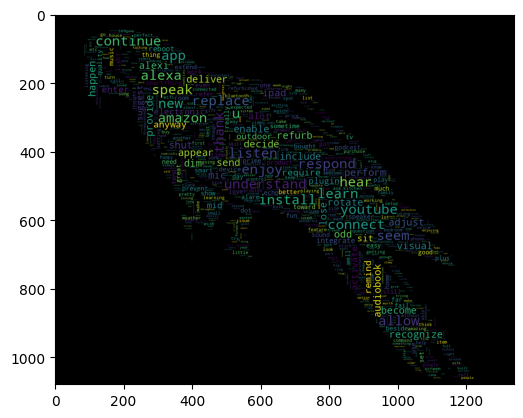

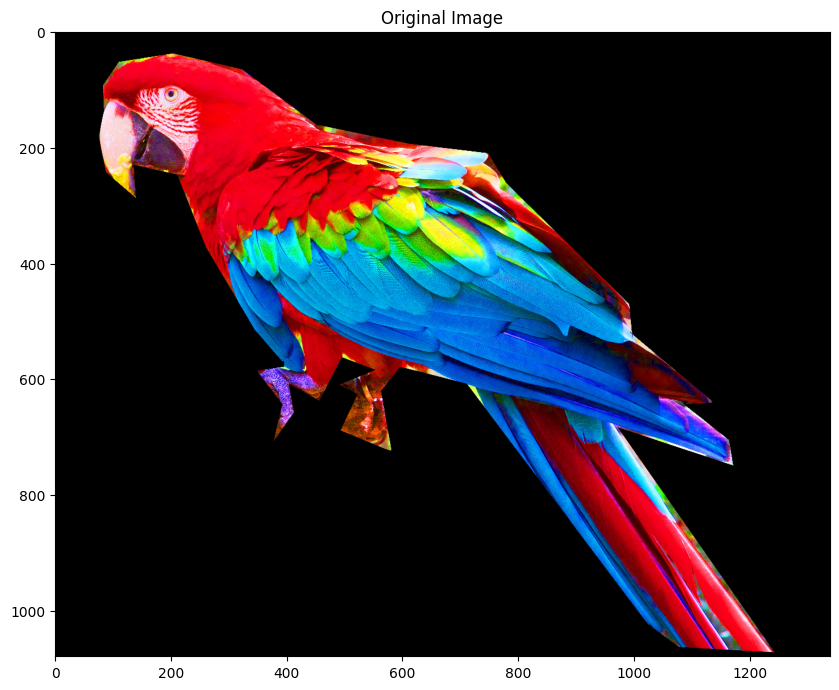

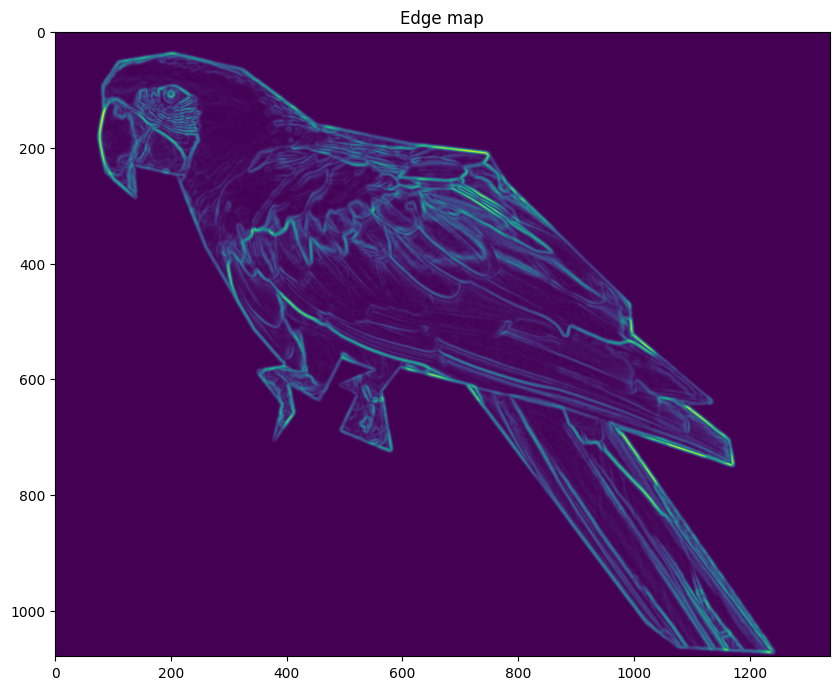

In [117]:
# All reviews
# Load image
parrot_color = np.array(Image.open(image_path))
parrot_color = parrot_color[::3, ::3]

# Create mask (white is "masked out")
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# Finesse: enforce boundaries between colors for less washed-out appearance
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# Create WordCloud
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# Generate Word Cloud
text_all = open(text_path_all, encoding="utf-8").read()
wc.generate(text_all)

# Plot WordCloud
plt.imshow(wc)

# Recolor the WordCloud based on the image colors
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)

# Save the WordCloud as an image
wc.to_file(os.path.join(base_path, "parrot_all.png"))

# Plot the Original Image
plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

# Plot the Edge map
plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

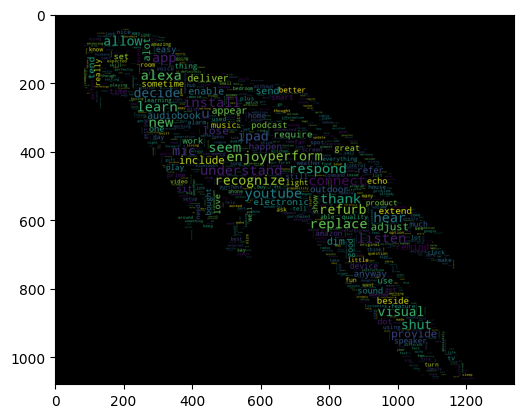

In [118]:
# Positive reviews
# Create WordCloud
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# Generate Word Cloud
text_pos = open(text_path_pos, encoding="utf-8").read()
wc.generate(text_pos)

# Plot WordCloud
plt.imshow(wc)

# Recolor the WordCloud based on the image colors
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)

# Save the WordCloud as an image
wc.to_file(os.path.join(base_path, "parrot_pos.png"))

plt.show()

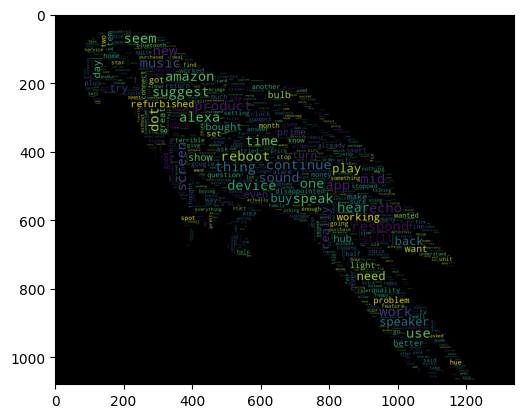

In [119]:
# Negative reviews
# Create WordCloud
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# Generate Word Cloud
text_neg = open(text_path_neg, encoding="utf-8").read()
wc.generate(text_neg)

# Plot WordCloud
plt.imshow(wc)

# Recolor the WordCloud based on the image colors
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)

# Save the WordCloud as an image
wc.to_file(os.path.join(base_path, "parrot_neg.png"))

plt.show()

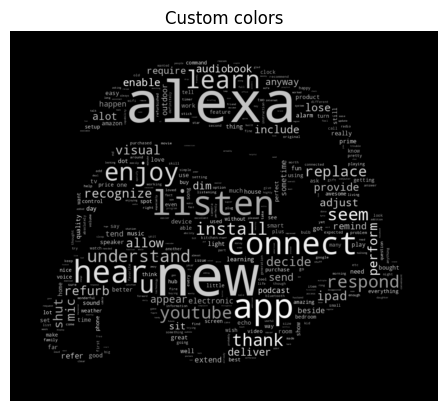

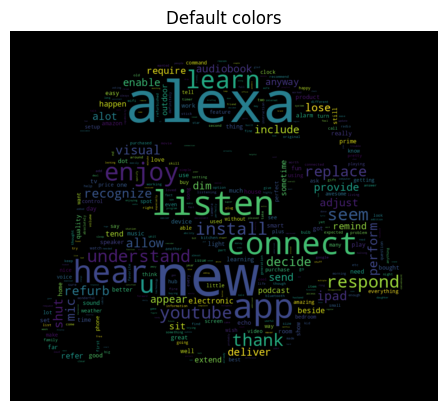

In [120]:
# Positive reviews
# """
# Using custom colors
# ===================

# Using the recolor method and custom coloring functions.
# """

from os import path
import random
from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask2 = np.array(Image.open(path.join(base_path, "stormtrooper_mask.png")))

text_pos = open(path.join(base_path, 'reviews_pos.txt')).read()

# adding specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask2, margin=10, random_state=42).generate(text_pos)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=42),
           interpolation="bilinear")
# Save the WordCloud as an image
wc.to_file(os.path.join(base_path, "stormtrooper_pos.png"))
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

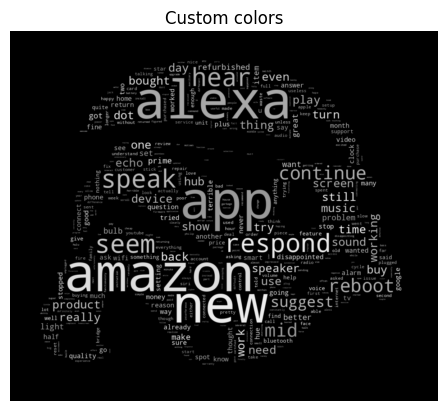

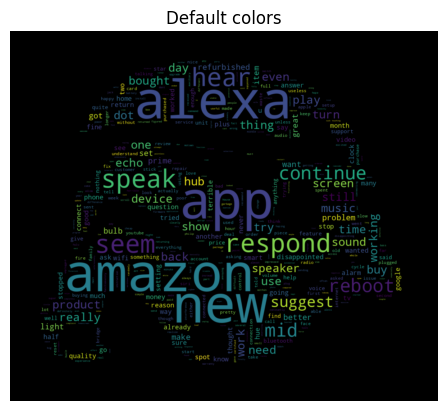

In [121]:
# Negative reviews
text_neg = open(path.join(base_path, 'reviews_neg.txt')).read()

wc = WordCloud(max_words=1000, mask=mask2, margin=10, random_state=42).generate(text_neg)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=42),
           interpolation="bilinear")
# Save the WordCloud as an image
wc.to_file(os.path.join(base_path, "stormtrooper_neg.png"))
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

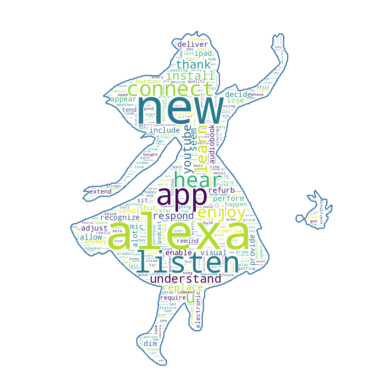

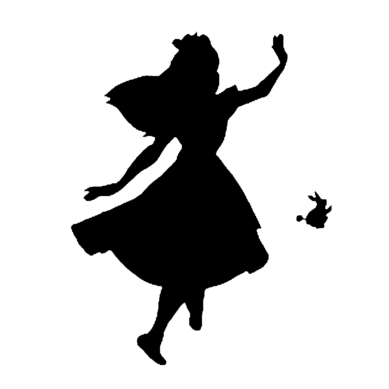

In [122]:
# Alice positive reviews
# read the mask image taken from
alice_mask = np.array(Image.open(path.join(base_path, "alice_mask.png")))

text_pos = open(path.join(base_path, 'reviews_pos.txt')).read()

stopwords = set(STOPWORDS)
stopwords.add("said")

wc_alice = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc_alice.generate(text_pos)

# store to file
wc_alice.to_file(path.join(base_path, "alice_pos.png"))

# show
plt.imshow(wc_alice, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

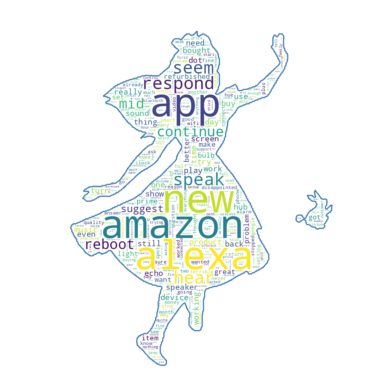

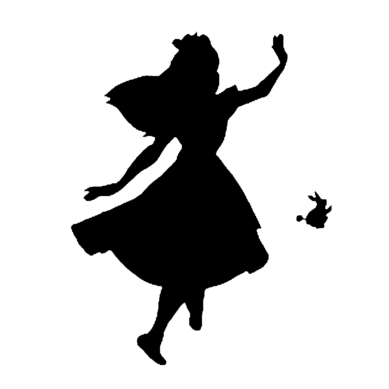

In [123]:
# Alice negative reviews

text_neg = open(path.join(base_path, 'reviews_neg.txt')).read()

# generate word cloud
wc_alice.generate(text_neg)

# store to file
wc_alice.to_file(path.join(base_path, "alice_neg.png"))

# show
plt.imshow(wc_alice, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

- In positive revies, commonly occurring words include:<br>
love <br>
echo <br>
great <br>
alexa <br>

- In negative reviews, commonly occurring words include: <br>
echo <br>
device <br>
work <br>
amazon

### **Length of sentences**

In [124]:
data2_pos['length'] = data2_pos['reviews_lemma'].apply(len)
data2_neg['length'] = data2_neg['reviews_lemma'].apply(len)

<ipython-input-124-0b79342da2ec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-0b79342da2ec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



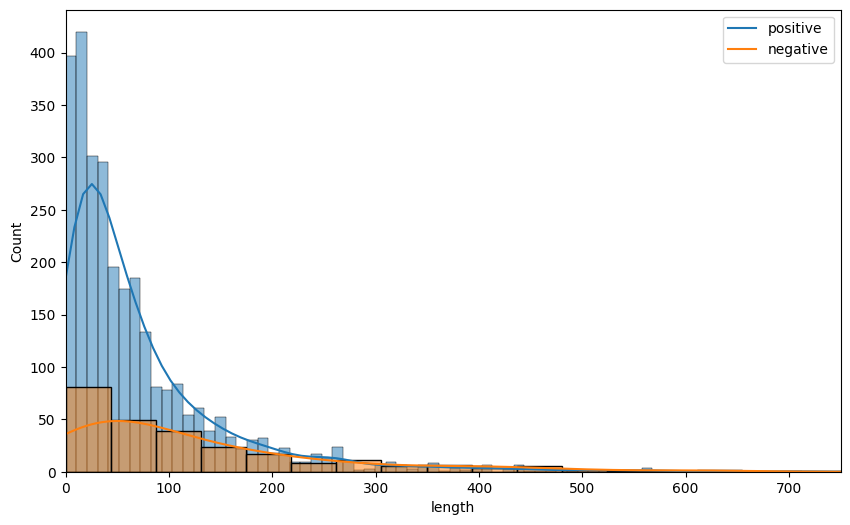

In [125]:
plt.figure(figsize=(10, 6))

sns.histplot(data2_pos['length'], kde=True)
sns.histplot(data2_neg['length'], kde=True)

plt.legend(['positive', 'negative'])
plt.xlim(0, 750)  # Set x-axis limit from 0 to 750
plt.show()

### **Histogram Interpretation**

- The length of positive and negative reviews generally differs.
- In the range of 0-275 words, positive reviews outnumber negative reviews.

# Preprocessing and Modelling

To build the corpus from the 'verified_reviews' we perform the following - <br>
1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [126]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words

In [127]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [128]:
#Saving the Count Vectorizer
pickle.dump(cv, open('/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/countVectorizer.pkl', 'wb'))

Checking the shape of X and y

In [129]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


Splitting data into train and test set with 30% data with testing.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [131]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 8


We'll scale X_train and X_test so that all values are between 0 and 1.

In [132]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [133]:
#Saving the scaler model
pickle.dump(scaler, open('/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/scaler.pkl', 'wb'))

In [134]:
# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Modelling and Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## *MODEL BENCHMARKING - RESAMPLED METHODE*

In [135]:
## Machine Learning Algorithm
logreg = LogisticRegression(random_state=2024)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2024)
rf = RandomForestClassifier(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
grad = GradientBoostingClassifier(random_state=2024)
xgb = XGBClassifier(random_state=2024)
lgbm = LGBMClassifier(random_state=2024)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
smote = SMOTE(random_state=2024)
near = NearMiss()
smoteen = SMOTEENN(random_state=2024)
smotenc = SMOTENC(random_state=2024, categorical_features=[3])

In [136]:
# A dictionary containing models used
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Decision Tree': tree,
          'XGBoost' : xgb,
          'Random Forest' : rf,
          'Gradient Boosting' : grad,
          'Ada Boosting' : ada,
          'Lgbm' : lgbm
          }

# A dictionary containing resampling method used
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
    'smoteenn': smoteen,
    'smotenc': smotenc,
}

# A dictionary containing metrics used
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

# List to store result
test_accuracy_arr1 = []
test_precision_arr1 = []
test_recall_arr1 = []
test_f1_arr1 = []
list_model1 = []
list_resample1 = []

# Iterate over all models, resampling, and cross-validate method
for name_resample,resample in resamples.items():
    for name_model,model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('resample', resample),
                ('model', model),
            ])

        list_model1.append(name_model)
        list_resample1.append(name_resample)
        scores = cross_validate(estimator, X_train_scl, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr1.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr1.append(scores['test_precision'].mean() * 100)
        test_recall_arr1.append(scores['test_recall'].mean() * 100)
        test_f1_arr1.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model1,
    'resample': list_resample1,
    'accuracy': test_accuracy_arr1,
    'precision': test_precision_arr1,
    'recall': test_recall_arr1,
    'F1': test_f1_arr1
})

model_bench

In [137]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csv = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Data/model_bench.csv'

# # Menyimpan DataFrame ke dalam file CSV
# model_bench.to_csv(file_csv, index=False)

# Import hasil model 2 kondisi
model_bench = pd.read_csv('/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Data/model_bench.csv')

In [138]:
model_bench.sort_values('accuracy', ascending=False).head(10)

,model,resample,accuracy,precision,recall,F1
41,Logistic Regression,smoteenn,81.107638,97.928663,83.498699,90.124909
20,Random Forest,rus,78.849605,98.573805,70.087802,81.870731
49,Logistic Regression,smotenc,76.663174,96.856275,87.622248,92.006417
25,Logistic Regression,smote,76.663174,96.856275,87.622248,92.006417
21,Gradient Boosting,rus,75.276834,98.448914,62.425326,76.325481
17,Logistic Regression,rus,74.349737,96.379132,88.949029,92.507105
45,Gradient Boosting,smoteenn,74.237968,96.773179,81.042781,88.204089
22,Ada Boosting,rus,73.630161,97.728217,65.620393,78.508351
54,Ada Boosting,smotenc,73.446548,96.610079,81.188996,88.224395
30,Ada Boosting,smote,73.446548,96.610079,81.188996,88.224395


In [139]:
model_bench[model_bench['resample'] == 'none'].sort_values('accuracy', ascending=False)

,model,resample,accuracy,precision,recall,F1
2,Decision Tree,none,66.013333,94.731778,97.053404,95.873487
6,Ada Boosting,none,63.959989,94.390796,98.329961,96.319212
3,XGBoost,none,61.017067,93.942154,98.968179,96.387903
7,Lgbm,none,60.510852,93.871768,98.526160,96.141229
1,Logistic Regression,none,60.242629,93.810917,99.754420,96.691239
5,Gradient Boosting,none,59.727441,93.742681,99.312280,96.446241
4,Random Forest,none,59.308968,93.680154,99.705280,96.598064
0,KNN,none,50.294118,92.377551,100.000000,96.037734


In [140]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=2024)
smoteenn = SMOTEENN(random_state=2024)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

## *MODEL BENCHMARKING - DEFAULT HYPERPARAMETER : CROSS VALIDATION*

### *MODEL BENCHMARKING - RESAMPLING : RUS & SMOTEENN*

In [141]:
models = [logreg, knn, tree, rf, ada, grad, xgb, lgbm]

list_mean_rus = []
list_std_rus = []
list_mean_smoteenn = []
list_std_smoteenn = []
list_mean_without_sampling = []
list_std_without_sampling = []

for model in  models :

    # modeling with undersampling (rus)
    pipe_model_rus = Pipeline([
        ('resample', rus),
        ('algo', model)
    ])

    model_cv_rus = cross_val_score(
        estimator = pipe_model_rus,
        X = X_train_scl,
        y = y_train,
        cv = skf,
        scoring = 'accuracy',
        n_jobs = -1
    )
    list_mean_rus.append(model_cv_rus.mean())
    list_std_rus.append(model_cv_rus.std())

    # modeling with Oversampling (ros)

    pipe_model_smoteenn = Pipeline([
        ('resample', smoteenn),
        ('algo', model)
    ])

    model_cv_smoteenn = cross_val_score(
        estimator = pipe_model_smoteenn,
        X = X_train_scl,
        y = y_train,
        cv = skf,
        scoring = 'accuracy',
        n_jobs = -1
    )
    list_mean_smoteenn.append(model_cv_smoteenn.mean())
    list_std_smoteenn.append(model_cv_smoteenn.std())

    # modeling without oversampling

    pipe_model_without_sampling = Pipeline([
        ('algo', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = X_train_scl,
        y = y_train,
        cv = skf,
        scoring = 'accuracy',
        n_jobs = -1
    )
    list_mean_without_sampling.append(model_cv_without_sampling.mean())
    list_std_without_sampling.append(model_cv_without_sampling.std())

In [142]:
# Assuming df is your DataFrame
df = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'XGBoost', 'LightGBM'],
    'mean_accuracy_without_sampling': list_mean_without_sampling,
    'mean_accuracy_smoteenn': list_mean_smoteenn,
    'mean_accuracy_rus': list_mean_rus,
    'std_accuracy_without_sampling': list_std_without_sampling,
    'std_accuracy_smoteenn': list_std_smoteenn,
    'std_accuracy_rus': list_std_rus
})

# Multiply all numeric values by 100 except for the 'model', 'std_accuracy_smoteenn' columns
df[df.columns.difference(['model', 'std_accuracy_without_sampling','std_accuracy_smoteenn',
                          'std_accuracy_rus'])] *= 100

# # Multiply all numeric values by 100 except for the 'model' column
# df[df.columns.difference(['model'])] *= 100

# Sort the DataFrame by the 'mean_accuracy_smoteenn' column in descending order
df = df.sort_values('mean_accuracy_smoteenn', ascending=False)

In [143]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csvB = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Data/model_benchB.csv'

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv(file_csvB, index=False)

# Import hasil model 2 kondisi
model_benchB = pd.read_csv('/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Data/model_benchB.csv')
model_benchB

,model,mean_accuracy_without_sampling,mean_accuracy_smoteenn,mean_accuracy_rus,std_accuracy_without_sampling,std_accuracy_smoteenn,std_accuracy_rus
0,Random Forest,93.514739,93.106576,71.428571,0.003076,0.005091,0.028249
1,XGBoost,93.151927,91.473923,69.478458,0.004625,0.010597,0.028162
2,LightGBM,92.698413,89.070295,61.315193,0.005250,0.028154,0.059661
3,Decision Tree,92.290249,82.721088,68.027211,0.007855,0.024481,0.013605
4,Logistic Regression,93.696145,82.176871,86.712018,0.002644,0.012633,0.018732
5,AdaBoost,93.061224,80.680272,66.848073,0.004206,0.038090,0.018050
6,GradientBoost,93.242630,78.548753,64.399093,0.004842,0.020312,0.037535
7,KNN,92.380952,74.240363,53.061224,0.001111,0.037414,0.031940


1. The best-performing model, when applying the under-sampling method (Random Under Sampler), over-sampling method (SMOTEENN) with default parameters, still exhibits superior performance without utilizing any resampling technique, as evident from the accuracy matrix.
1. The most robust models, as indicated by the smallest standard deviation values, are Logistic Regression and Random Forest.

In [144]:
model_conf = [
    ('Random Forest', rf),
    ('XGBoost', xgb)
]

resample_conf = [
    ('none', None),
    ('smoteenn', smoteen),
    ('RUS', rus)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in model_conf:
    for name_resample, resample in resample_conf:

        if resample == None:
            pipeline_conf = Pipeline([
                ('model', model),
            ])
        else:
            pipeline_conf = Pipeline([
                ('resample', resample),
                ('model', model),
            ])

        pipeline_conf.fit(X_train_scl, y_train)
        y_pred = pipeline_conf.predict(X_test_scl)

        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model}_{name_resample}' for name_model, _ in model_conf for name_resample, _ in resample_conf]
df_metrics = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)
df_metrics = df_metrics.sort_values('Accuracy', ascending=False) # Display Resample Result, Sort by Accuracy

# Display the resulting DataFrame
df_metrics

,Recall,Accuracy,Precision,F1
Random Forest_none,99.531067,92.910053,93.092105,96.203966
Random Forest_smoteenn,98.827667,92.486772,93.252212,95.959021
XGBoost_none,98.358734,91.322751,92.502756,95.340909
XGBoost_smoteenn,94.841735,90.793651,94.953052,94.897361
Random Forest_RUS,68.347011,69.841270,97.491639,80.358374
XGBoost_RUS,67.174678,68.994709,97.781570,79.638638


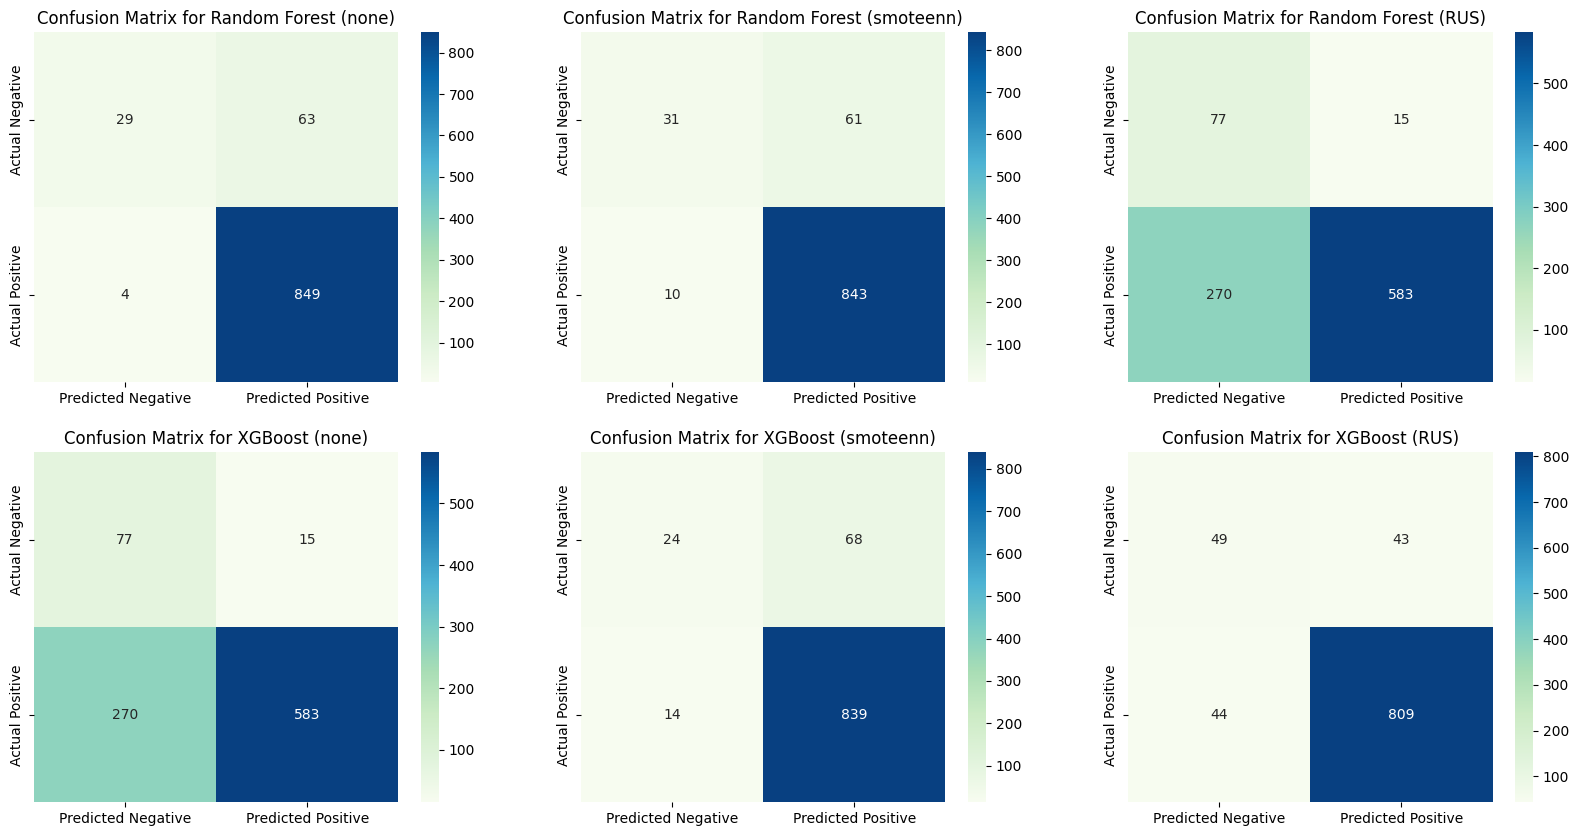

In [145]:
# Display the confusion matrix for models
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (model_name, _) in enumerate(model_conf):
    for j, (resample_name, _) in enumerate(resample_conf):
        sns.heatmap(conf_matrix[2*i + j], annot=True, fmt='d', cmap='GnBu',
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[i][j])
        axes[i][j].set_title(f"Confusion Matrix for {model_name} ({resample_name})");

Insights from the above conditions are derived from the model on the training dataset:

1. For logistic regression and random forest models without resampling treatment, the accuracy values are 92.17% and 93.54%, respectively. Under default parameters and the same conditions (random state = 2024), the random forest model outperforms the logistic regression model.

1. After applying both random under-sampling (RUS) and SMOTEENN resampling techniques, the random forest model with SMOTEENN resampling shows a general increase in accuracy by +0.64%. This indicates an overall improvement in the proportion of True Positives (correctly predicted positive reviews) and True Negatives (correctly predicted negative reviews).

1. Under default parameters and the same random state, the SMOTEENN method proves to be superior to RUS for the random forest model. Consequently, the choice is made to use the random forest model with SMOTEENN resampling and without resampling for hyperparameter tuning.

### *MODEL BENCHMARKING- DEFAULT HYPERPARAMETER : TRAIN & TEST DATA*

In [146]:
models = [logreg, knn, tree, rf, ada, grad, xgb, lgbm]
score_accuracy_test = []
score_accuracy_train = []

def y_pred_func(model):
    estimator = Pipeline([
        ('resample', smoteenn),
        ('algo', model)
    ])
    estimator.fit(X_train_scl,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train_scl)
    score_accuracy_test.append(accuracy_score(y_test,y_pred_test))
    score_accuracy_train.append(accuracy_score(y_train,y_pred_train))

[LightGBM] [Info] Number of positive: 1602, number of negative: 1783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10253
[LightGBM] [Info] Number of data points in the train set: 3385, number of used features: 565
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473264 -> initscore=-0.107044
[LightGBM] [Info] Start training from score -0.107044


In [147]:
# Assuming you have the DataFrame as described in your code
df2 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'XGBoost', 'LightGBM'],
                   'accuracy score (train set)': score_accuracy_train,
                   'accuracy score (validation set)': list_mean_smoteenn,
                   'accuracy score (test set)': score_accuracy_test})

# Multiply all numeric columns (excluding 'model') by 100
df2.iloc[:, 1:] *= 100

# Set the 'model' column as the index and sort by the 'accuracy score (test set)' column in descending order
df2.set_index('model').sort_values(by='accuracy score (test set)', ascending=False)

,accuracy score (train set),accuracy score (validation set),accuracy score (test set)
model,,,
Random Forest,98.502722,93.285405,92.486772
XGBoost,95.372051,90.109050,91.111111
LightGBM,92.014519,88.341476,86.031746
KNN,80.127042,73.866832,84.867725
Logistic Regression,85.934664,81.351989,84.656085
Decision Tree,90.154265,85.934859,79.470899
GradientBoost,82.350272,78.993403,78.412698
AdaBoost,82.123412,80.443414,75.978836


- It is evident that both the random forest and XGBoost models stand out as the best-performing models. Both exhibit commendable accuracy scores and demonstrate stability across both the train and test sets. This suggests that, following hyperparameter tuning for one of their hyperparameters, both models have significantly improved accuracy in predicting positive and negative reviews.

- Therefore, let's designate random forest and XGBoost as our benchmark models.

- Now, let's proceed with hyperparameter tuning for both models to achieve even better results.

## Random Forest Hyperparameter Tuning

In [148]:
# Max depth
k = range(1,151,5)
testing_accuracies1 = []
training_accuracies1 = []
score1 = 0

for i in k:
  rf = RandomForestClassifier(
      random_state = 2024,
      bootstrap = True,
      max_depth = i)
  rf.fit(X_train_scl,y_train)

  y_predict_train = rf.predict(X_train_scl)
  training_accuracies1.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = rf.predict(X_test_scl)
  accuracy_score1 = accuracy_score(y_test,y_predict_test)
  testing_accuracies1.append(accuracy_score1)

  if score1 < accuracy_score1:
    score1 = accuracy_score1
    best_k = i

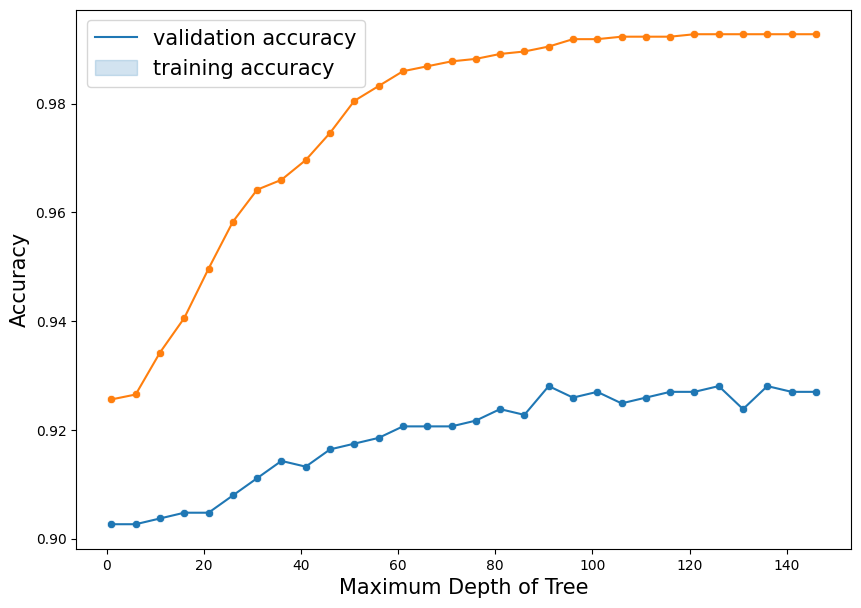

In [149]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=k, y=testing_accuracies1)
sns.scatterplot(x=k, y=testing_accuracies1)
sns.lineplot(x=k, y=training_accuracies1)
sns.scatterplot(x=k, y=training_accuracies1)
plt.legend(['validation accuracy', 'training accuracy'], fontsize=15)
plt.xlabel('Maximum Depth of Tree', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

In [150]:
print('best maximum depth:', best_k)
print(f'Accuracy: {round(score1*100,2)}%')
# 91, 126, 136

best maximum depth: 91
Accuracy: 92.8%


In [151]:
# min_samples_split
s = range(2,50,2)
testing_accuracies2 = []
training_accuracies2 = []
score2 = 0

for i in s:
  rf = RandomForestClassifier(
      random_state = 2024,
      bootstrap = True,
      max_depth = 100,
      min_samples_split = i)
  rf.fit(X_train_scl,y_train)

  y_predict_train = rf.predict(X_train_scl)
  training_accuracies2.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = rf.predict(X_test_scl)
  accuracy_score2 = accuracy_score(y_test,y_predict_test)
  testing_accuracies2.append(accuracy_score2)

  if score2 < accuracy_score2:
    score2 = accuracy_score2
    best_s = i

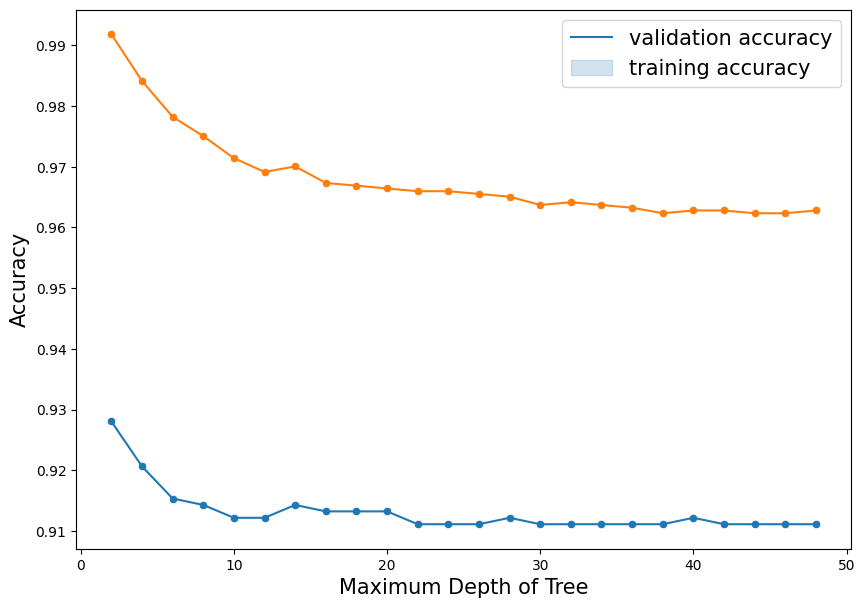

In [152]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=s, y=testing_accuracies2)
sns.scatterplot(x=s, y=testing_accuracies2)
sns.lineplot(x=s, y=training_accuracies2)
sns.scatterplot(x=s, y=training_accuracies2)
plt.legend(['validation accuracy', 'training accuracy'], fontsize=15)
plt.xlabel('Maximum Depth of Tree', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

In [153]:
print('best minimum sample split:', best_s)
print(f'Accuracy: {round(score2*100,2)}%')
# A.116-2 B. 140-2 C.100-2

best minimum sample split: 2
Accuracy: 92.8%


In [197]:
# # Define Hyperparameter space
# hyperparam_space = {
#     'model__bootstrap': [True],
#     'model__min_samples_split': [2],
#     'model__max_depth': [91, 126, 136],
#     'model__n_estimators': [100, 200, 300]
# }

# rf = RandomForestClassifier(random_state=2024)
# smoteenn = SMOTEENN(random_state=2024)

# pipe_model = Pipeline([
#     ('resampling', smoteenn),
#     ('model', rf)
# ])

# # Define the grid search
# gridsearch_rfB = GridSearchCV(
#     estimator=pipe_model,
#     param_grid=hyperparam_space,     # hyperparameter space
#     cv=StratifiedKFold(n_splits=5),  # cross-validation scheme
#     scoring='accuracy',              # evaluation metrics
#     verbose=0,
#     n_jobs=-1                        # To speed up the process by utilizing multiple cores of the machine
# )

# gridsearch_rfB.fit(X_train_scl, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('resampling',
                                        SMOTEENN(random_state=2024)),
                                       ('model',
                                        RandomForestClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [91, 126, 136],
                         'model__min_samples_split': [2],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [198]:
import os
import pickle

# # Assuming gridsearch_logreg is the model you want to save
# filenameB = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/RandomForestHyperTuningB.pkl'

# # Save the model to the specified file
# with open(filenameB, 'wb') as file:
#     pickle.dump(gridsearch_rfB, file)

# load model
filename = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/RandomForestHyperTuningB.pkl'
gridsearch_rfB = pickle.load(open(filename,'rb'))
# gridsearch_rf.fit(X_train_scl, y_train)

In [199]:
# Showing the chosen parameters details by the Grid Search based on Train dataset
print('Best Hyperparameters: ', gridsearch_rfB.best_params_)
print('Best Score: ', gridsearch_rfB.best_score_)

Best Hyperparameters:  {'model__bootstrap': True, 'model__max_depth': 126, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Score:  0.9360296846011131


The best hyperparameters for the Random Forest model from the GridSearchCV results are as follows: bootstrap = True, max_depth = 116, min_samples_split = 8, and n_estimators = 100, achieving an accuracy score of 93.28%.

In [200]:
# Assigning the best model GridSearchCV
rf_tuning = gridsearch_rfB.best_estimator_
rf_tuning.fit(X_train_scl, y_train)

Pipeline(steps=[('resampling', SMOTEENN(random_state=2024)),
                ('model',
                 RandomForestClassifier(max_depth=126, n_estimators=200,
                                        random_state=2024))])

In [201]:
# Predict the test dataset using the best model from grid search process
y_pred_rf_tuning = rf_tuning.predict(X_test_scl)

accuracy_rf_tuning = accuracy_score(y_test, y_pred_rf_tuning) * 100
precision_rf_tuning = precision_score(y_test, y_pred_rf_tuning) * 100
recall_rf_tuning = recall_score(y_test, y_pred_rf_tuning) * 100
f1_rf_tuning = f1_score(y_test, y_pred_rf_tuning) * 100


rf_after_tuning = pd.DataFrame({'Recall': recall_rf_tuning,
                                'Accuracy': accuracy_rf_tuning,
                                'Precision': precision_rf_tuning,
                                'F1': f1_rf_tuning}, index=['Random Forest After Parameter Tuning'])

# Display the metrics for the Grid Search
df_metrics2 = df_metrics.copy()
df_metrics2 = df_metrics2.rename(index={'Random Forest_smoteenn': 'Random Forest before Parameter Tuning'})
df_metrics2 = df_metrics2.loc[['Random Forest before Parameter Tuning']]

df_metrics_tuning = pd.concat([rf_after_tuning, df_metrics2])
df_metrics_tuning

,Recall,Accuracy,Precision,F1
Random Forest After Parameter Tuning,98.710434,92.275132,93.141593,95.845191
Random Forest before Parameter Tuning,98.827667,92.486772,93.252212,95.959021


Based on the table above, there was an increase in the 'accuracy' score by +0.43% after hyperparameter tuning, although this resulted in a decrease in 'recall' due to a trade-off between the two metrics.

##### *`CONFUSION MATRIX`*

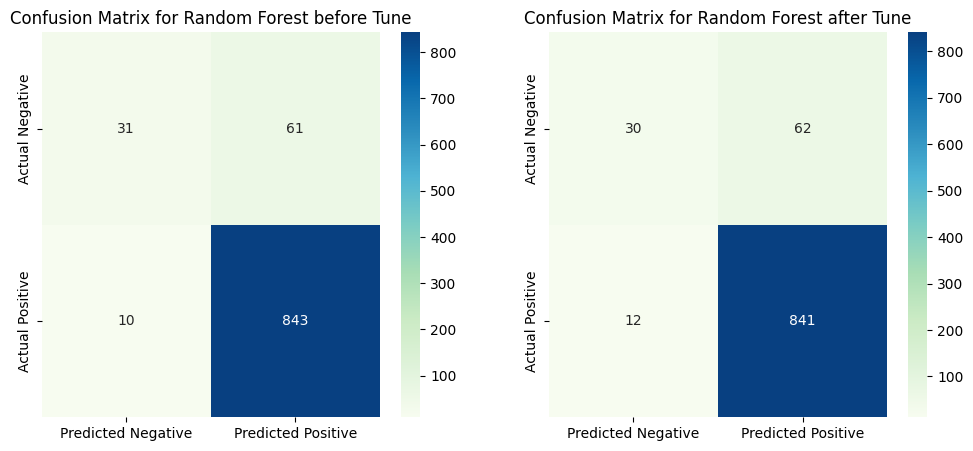

In [159]:
# Display the confusion matrix for Random Forest after tuning
conf_tuned_rf = confusion_matrix(y_test, y_pred_rf_tuning)

# Define the models and confusion matrices
rf_models = [('Random Forest', models[3]), ('Random Forest', rf_tuning)]
rf_conf_matrices = [conf_matrix[1], conf_tuned_rf]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, (name, _) in enumerate(rf_models):
    sns.heatmap(rf_conf_matrices[i], annot=True, fmt='d', cmap='GnBu',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(rf_models) - 1 else ' after Tune'))


## XGBoost Hyperparameter Tuning

In [160]:
# Max depth
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
testing_accuraciesA = []
training_accuraciesA = []
scoreA = 0

for i in hyperparam_c:
  xgbA = XGBClassifier(
      random_state = 2024,
      alpha = i)
  xgbA.fit(X_train_scl,y_train)

  y_predict_train = xgbA.predict(X_train_scl)
  training_accuraciesA.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = xgbA.predict(X_test_scl)
  accuracy_scoreA = accuracy_score(y_test,y_predict_test)
  testing_accuraciesA.append(accuracy_scoreA)

  if scoreA < accuracy_scoreA:
    scoreA = accuracy_scoreA
    best_hyperparam_c = i

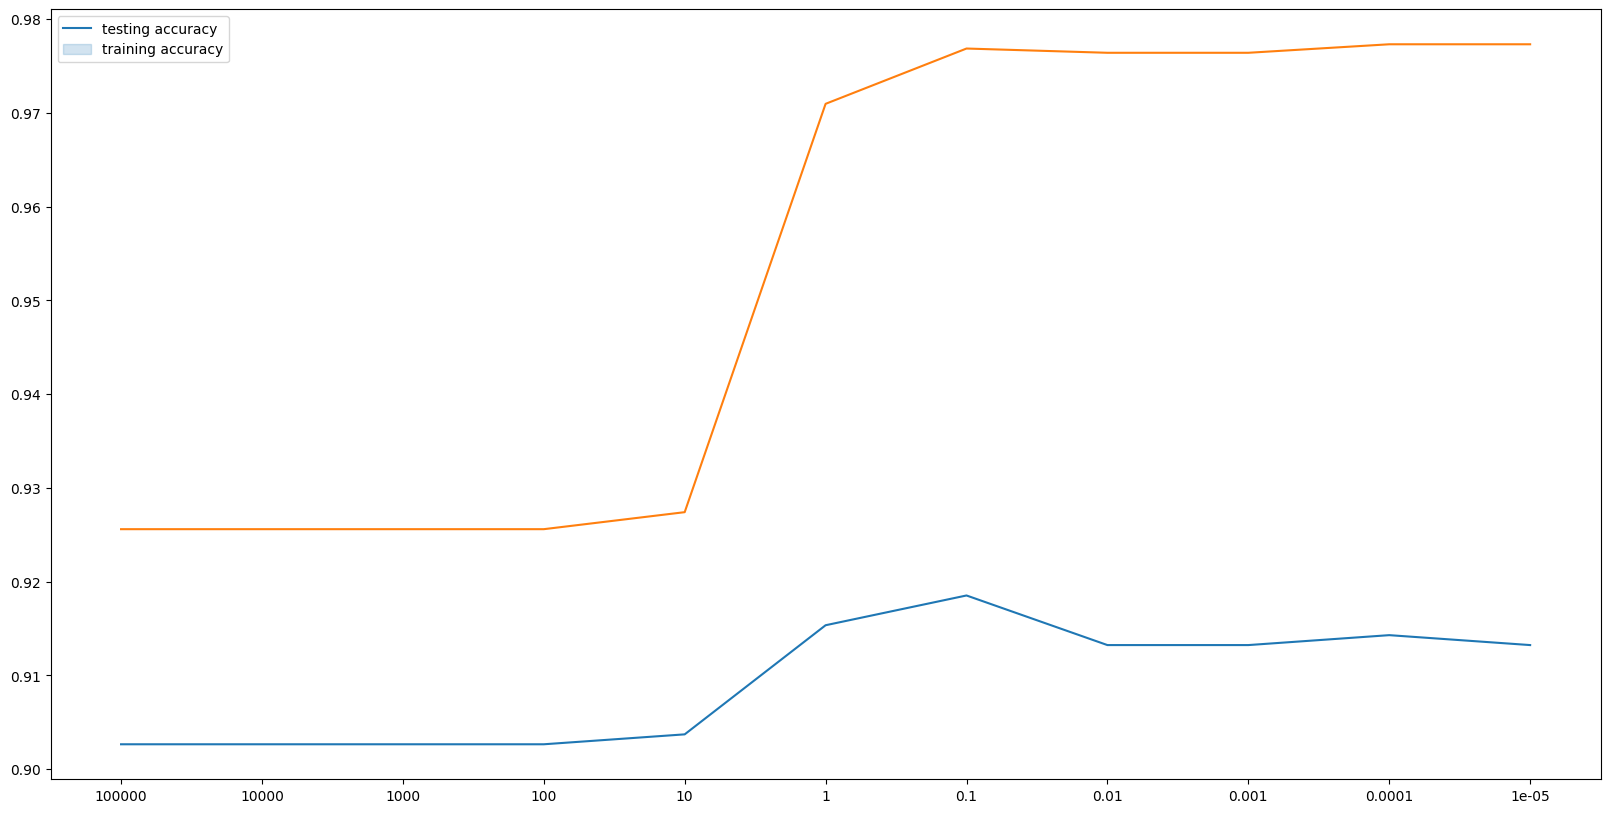

In [161]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_accuraciesA)
sns.lineplot(x=length,y=training_accuraciesA)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(length,hyperparam_c)
plt.show()

In [162]:
print('best maximum depth:', best_hyperparam_c)       # 0.1, 0.001, 0.0001
print(f'Accuracy: {round(scoreA*100,2)}%')

best maximum depth: 0.1
Accuracy: 91.85%


In [163]:
# Max depth
k2 = range(1,101,2)
testing_accuracies2 = []
training_accuracies2 = []
score2 = 0

for i in k2:
  xgb = XGBClassifier(
      random_state = 2024,
      alpha = 0.001,
      max_depth = i)
  xgb.fit(X_train_scl,y_train)

  y_predict_train = xgb.predict(X_train_scl)
  training_accuracies2.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = xgb.predict(X_test_scl)
  accuracy_score2 = accuracy_score(y_test,y_predict_test)
  testing_accuracies2.append(accuracy_score2)

  if score2 < accuracy_score2:
    score2 = accuracy_score2
    best_k2 = i

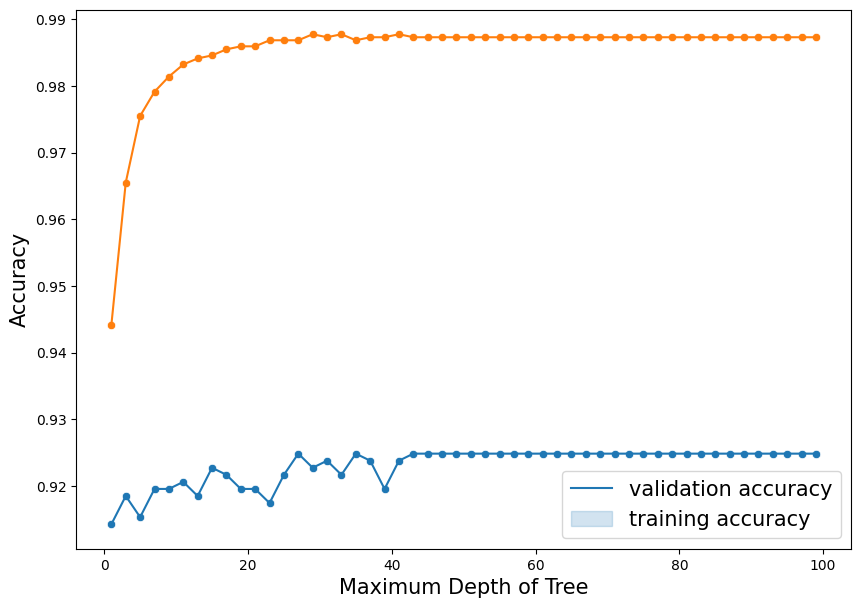

In [164]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=k2, y=testing_accuracies2)
sns.scatterplot(x=k2, y=testing_accuracies2)
sns.lineplot(x=k2, y=training_accuracies2)
sns.scatterplot(x=k2, y=training_accuracies2)
plt.legend(['validation accuracy', 'training accuracy'], fontsize=15)
plt.xlabel('Maximum Depth of Tree', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

In [165]:
print('best maximum depth:', best_k2)       # 45, 27, 23
print(f'Accuracy: {round(score2*100,2)}%')

best maximum depth: 27
Accuracy: 92.49%


In [166]:
# subsample
s2 = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
testing_accuracies2B = []
training_accuracies2B = []
score2B = 0

for i in s2:
  xgb2B = XGBClassifier(
      random_state = 2024,
      alpha = 0.001,
      max_depth = 27,
      subsample = i)
  xgb2B.fit(X_train_scl,y_train)

  y_predict_train = xgb2B.predict(X_train_scl)
  training_accuracies2B.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = xgb2B.predict(X_test_scl)
  accuracy_score2B = accuracy_score(y_test,y_predict_test)
  testing_accuracies2B.append(accuracy_score2B)

  if score2B < accuracy_score2B:
    score2B = accuracy_score2B
    best_s2 = i

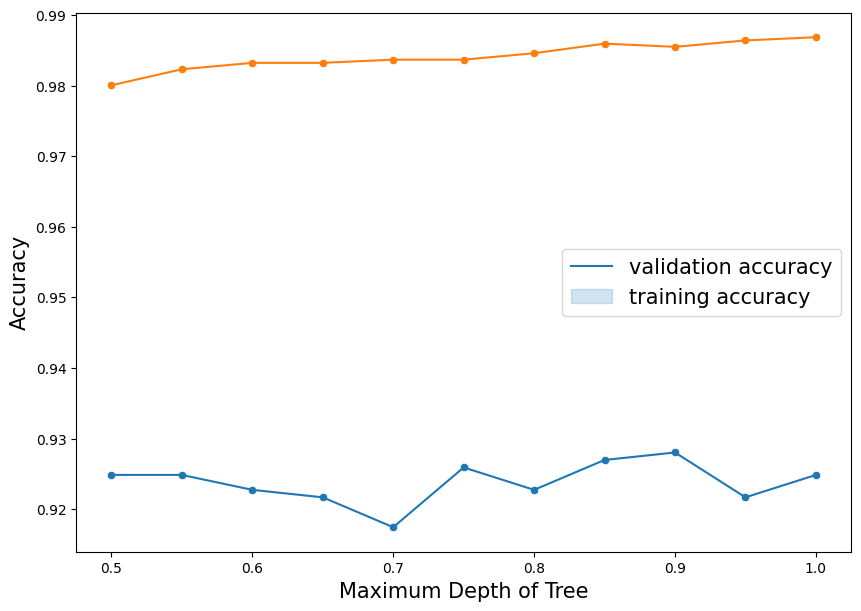

In [167]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=s2, y=testing_accuracies2B)
sns.scatterplot(x=s2, y=testing_accuracies2B)
sns.lineplot(x=s2, y=training_accuracies2B)
sns.scatterplot(x=s2, y=training_accuracies2B)
plt.legend(['validation accuracy', 'training accuracy'], fontsize=15)
plt.xlabel('Maximum Depth of Tree', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

In [168]:
print('best subsample:', best_s2)            # 0.8, 0.85, 1
print(f'Accuracy: {round(score2B*100,2)}%')

best subsample: 0.9
Accuracy: 92.8%


In [169]:
# eta
m2 = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
testing_accuracies2C = []
training_accuracies2C = []
score2C = 0

for i in m2:
  xgb2C = XGBClassifier(
      random_state = 2024,
      max_depth = 45,
      subsample = 1,
      eta = i)
  xgb2C.fit(X_train_scl,y_train)

  y_predict_train = xgb2C.predict(X_train_scl)
  training_accuracies2C.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = xgb2C.predict(X_test_scl)
  accuracy_score2C = accuracy_score(y_test,y_predict_test)
  testing_accuracies2C.append(accuracy_score2C)

  if score2C < accuracy_score2C:
    score2C = accuracy_score2C
    best_m2 = i

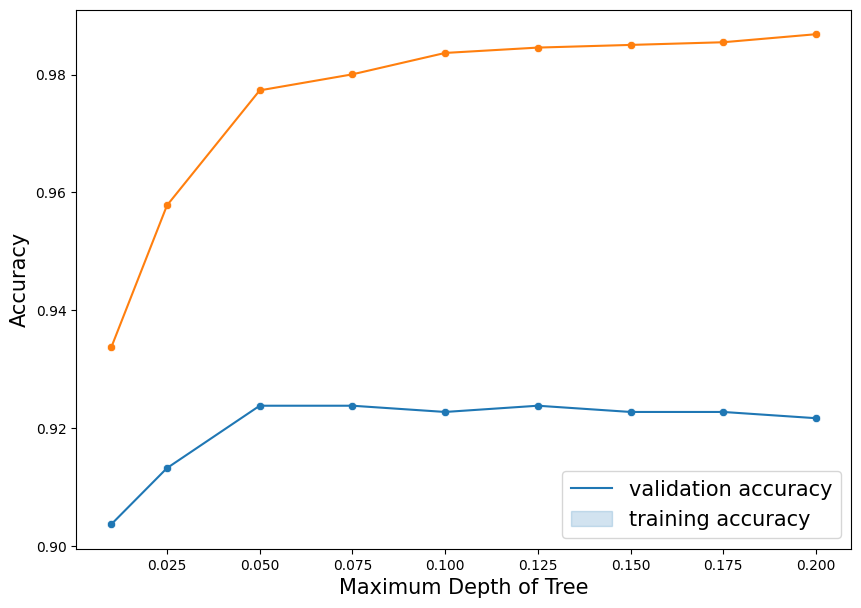

In [170]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=m2, y=testing_accuracies2C)
sns.scatterplot(x=m2, y=testing_accuracies2C)
sns.lineplot(x=m2, y=training_accuracies2C)
sns.scatterplot(x=m2, y=training_accuracies2C)
plt.legend(['validation accuracy', 'training accuracy'], fontsize=15)
plt.xlabel('Maximum Depth of Tree', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.show()

In [171]:
print('best eta:', best_m2)            # 0.125, 0.15, 175
print(f'Accuracy: {round(score2C*100,2)}%')

best eta: 0.05
Accuracy: 92.38%


In [172]:
# # Define Hyperparameter space
# hyperparam_space2 = {
#     'model__alpha': [0.1, 0.001, 0.0001],
#     'model__max_depth': range(20,41,2),
#     # 'model__max_depth': [23, 27, 45],
#     # 'model__subsample': [0.8, 0.85, 1],
#     'model__eta': [0.125, 0.15, 175]
# }

# xgb = XGBClassifier(random_state=2024)
# smoteenn = SMOTEENN(random_state=2024)

# pipe_model2 = Pipeline([
#     ('resampling', smoteenn),
#     ('model', xgb)
# ])

# # Define the grid search
# gridsearch_xgb = GridSearchCV(
#     estimator=pipe_model2,
#     param_grid=hyperparam_space2,     # hyperparameter space
#     cv=StratifiedKFold(n_splits=5),  # cross-validation scheme
#     scoring='accuracy',              # evaluation metrics
#     verbose=0,
#     n_jobs=-1                        # To speed up the process by utilizing multiple cores of the machine
# )

# gridsearch_xgb.fit(X_train_scl, y_train)

In [173]:
# # Assuming gridsearch_logreg is the model you want to save
# filename2 = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/XGBoostHyperTuning.pkl'

# # Save the model to the specified file
# with open(filename2, 'wb') as file:
#     pickle.dump(gridsearch_xgb, file)

# load model
filename2 = '/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/XGBoostHyperTuning.pkl'
gridsearch_xgb = pickle.load(open(filename2,'rb'))

In [174]:
# Showing the chosen parameters details by the Grid Search based on Train dataset
print('Best Hyperparameters: ', gridsearch_xgb.best_params_)
print('Best Score: ', gridsearch_xgb.best_score_)

Best Hyperparameters:  {'model__alpha': 0.001, 'model__eta': 0.125, 'model__max_depth': 20}
Best Score:  0.9156462585034013


The best hyperparameters for the XGBoost model from the GridSearchCV results are as follows: eta = 0.125, max_depth = 21, and subsample = 0.85, achieving an accuracy score of 91.47%.

In [175]:
# Assigning the best model GridSearchCV
xgb_tuning = gridsearch_xgb.best_estimator_
xgb_tuning.fit(X_train_scl, y_train)

Pipeline(steps=[('resampling', SMOTEENN(random_state=2024)),
                ('model',
                 XGBClassifier(alpha=0.001, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.125,
                               eval_metric=None, feature_types=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, ...))])

In [176]:
# Predict the test dataset using the best model from grid search process
y_pred_xgb_tuning = xgb_tuning.predict(X_test_scl)

accuracy_xgb_tuning = accuracy_score(y_test, y_pred_xgb_tuning) * 100
precision_xgb_tuning = precision_score(y_test, y_pred_xgb_tuning) * 100
recall_xgb_tuning = recall_score(y_test, y_pred_xgb_tuning) * 100
f1_xgb_tuning = f1_score(y_test, y_pred_xgb_tuning) * 100

xgb_after_tuning = pd.DataFrame({'Recall': recall_xgb_tuning,
                                'Accuracy': accuracy_xgb_tuning,
                                'Precision': precision_xgb_tuning,
                                'F1': f1_xgb_tuning}, index=['XGBoost After Parameter Tuning'])

# Display the metrics for the Grid Search
df_metrics3 = df_metrics.copy()
df_metrics3 = df_metrics3.rename(index={'XGBoost_smoteenn': 'XGBoost before Parameter Tuning'})
df_metrics3 = df_metrics3.loc[['XGBoost before Parameter Tuning']]

df_metrics_tuning3 = pd.concat([xgb_after_tuning, df_metrics3])
df_metrics_tuning3

,Recall,Accuracy,Precision,F1
XGBoost After Parameter Tuning,95.310668,91.005291,94.755245,95.032145
XGBoost before Parameter Tuning,94.841735,90.793651,94.953052,94.897361


Applying grid search to get the optimal parameters on random forest

In [177]:
# params = {
#     'bootstrap': [True],
#     'max_depth': [100, 116, 40],
#     'min_samples_split': [2, 8, 12],
#     'n_estimators': [100, 200, 300]
# }

In [178]:
# cv_object = StratifiedKFold(n_splits = 2)

# grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
# grid_search.fit(X_train_scl, y_train.ravel())

In [179]:
# #Getting the best parameters from the grid search


# print("Best Parameter Combination : {}".format(grid_search.best_params_))

In [180]:
# print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
# print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
# print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

#### XgBoost

In [181]:
# model_xgb = XGBClassifier()
# model_xgb.fit(X_train_scl, y_train)

In [182]:
# #Accuracy of the model on training and testing data

# print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
# print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

In [183]:
# y_preds = model_xgb.predict(X_test)

In [184]:
# #Confusion Matrix
# cm = confusion_matrix(y_test, y_preds)
# print(cm)

In [185]:
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
# cm_display.plot()
# plt.show()

In [186]:
# #Saving the XGBoost classifier
# pickle.dump(model_xgb, open('/content/drive/MyDrive/NLP Projects/Sentiment-Analysis/Models/model_xgb.pkl', 'wb'))

#### Decision Tree Classifier

In [187]:
# model_dt = DecisionTreeClassifier()
# model_dt.fit(X_train_scl, y_train)

In [188]:
# #Accuracy of the model on training and testing data

# print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
# print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

In [189]:
# y_preds = model_dt.predict(X_test)

In [190]:
# #Confusion Matrix
# cm = confusion_matrix(y_test, y_preds)
# print(cm)

In [191]:
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
# cm_display.plot()
# plt.show()